# complex custom shapes in py5

Out of the box, py5 includes a handful of basic functions to draw shapes, like `ellipse()`, `quad()`, and `triangle()`. However, you'll often find yourself wanting to draw something that does not fit simply into any pre-defined category. If you want to draw a heart, star, octagon or Pokémon, you *could* try to build it out of existing shapes... but in most situations, it's better to make a custom shape yourself. In this tutorial, we'll explore using points and curves to draw all sorts of complex glyphs. 

Two types of curves well-known in mathematics and visualization are inherently understood by the py5 language - [Bézier curves](https://en.wikipedia.org/wiki/B%C3%A9zier_curve) and [Catmull-Rom splines](https://en.wikipedia.org/wiki/Cubic_Hermite_spline#Catmull%E2%80%93Rom_spline). Thankfully, the complex underlying calculus is handled by py5, and your only responsibility will be to understand *control points* and position them by their coordinates within py5. 

## loading images into py5

To better understand coordinates themselves, it can be easier if you have a visual guide. You can take this grid image and place it as a background in your py5 sketches (if you're using them somewhere on your computer) to make things easier. If you're using an online environment to play with py5, you'll instead want to link to the entire URL of the image so that py5 can find it.

<a href="images/complex_shapes/grid.png">grid.png</a>

You can place images in the same local folder as your py5 sketch in order to load them - `.gif`, `.jpg`, `.png` and `.tga` file types are all supported. (Many operating systems hide file extensions by default, so you're encouraged to hunt around and find out how to enable them in yours!) 

Displaying an image in py5 is a two-step process: loading the file itself into your sketch as an image, and then displaying that image. Put your `grid.png` file in in the same folder as your py5 sketch, or in a folder inside of that sketch, and make sure you're giving py5 the full path to find it.

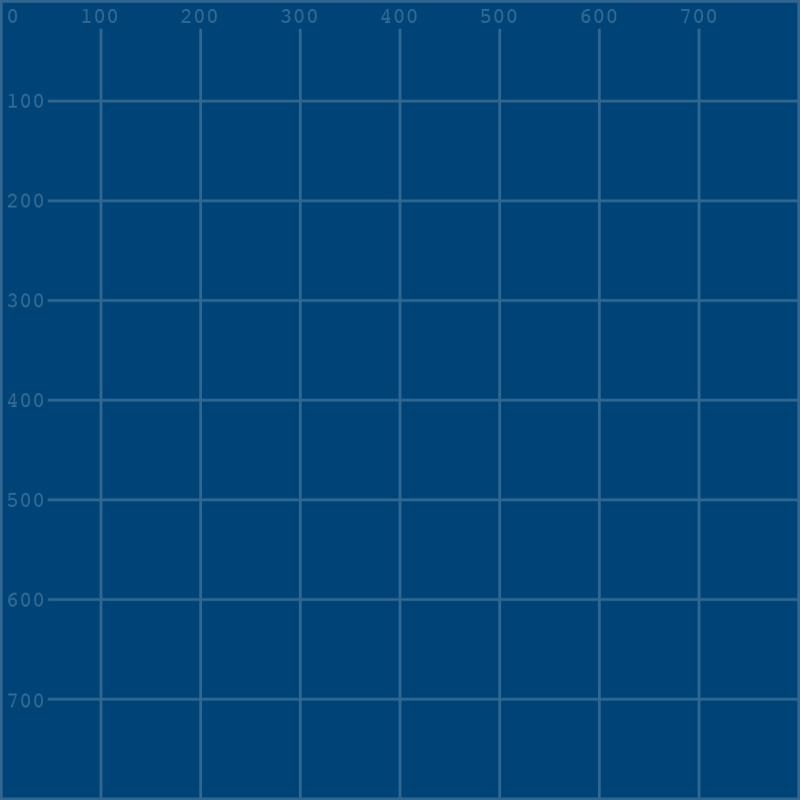

In [1]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

You can see that loading an image is done by declaring it as a variable, in this case named *grid*, and assigning the local filename to it using the `load_image()` function. By default, py5 will look in the folder where your sketch file lives, and will also look in a subfolder called DATA if one exists. Try moving *grid.png* into a new folder called DATA, and the code will still work even if you only tell it to look for *grid.png*!
 
However you choose to load it into the sketch, if your grid image is in the right place, running your sketch will reward you with this grid image as your background. Any subsequent lines of code will draw over this background, making it very easy to see the link between your coordinates and the actual output.

In the `image()` function, the first argument is the name of the image (that we defined just one line earlier), and the next two arguments are the x and y coordinates where you will place the image. `image()` also takes a variety of optional arguments - for example, a width and height at which to display the image. 

*Reference: [image()](/reference/sketch_image), [load_image()](/reference/sketch_load_image)*

## using Catmull-Rom splines

In py5, we can use the `curve()` function to implement Catmull-Rom splines (named after Edwin Catmull and Raphael Rom). To help in visualizing these curves, let's first draw a diagonal line.

In [ ]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

stroke('#0099FF') # pale blue
line(100,100, 400,400)

<img src="images/complex_shapes/diagonal.png">

Using our grid background, it's easy to see that the first set of arguments *(100, 100)* correspond to the end of the line at the top left, and the second set of arguments *(400, 400)* correspond to the end of the line at the bottom right. When we gave these two points as arguments, a line was drawn between them. Disable this line by "commenting it out" and replace it with a curve...

In [ ]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

stroke('#0099FF') # pale blue
#line(100,100, 400,400)
curve(0,0, 100,100, 400,400, 500,500)

Visually, nothing has changed. If you take a look at this `curve()` function, the middle sets of arguments are identical to those we gave the `line()` a moment before. The extra arguments at the beginning and end - 0,0 and 500,500 - are control points, which we'll explore more shortly. To see what happens if you begin adjusting the coordinates of the control points, let's create a second curve of a different color.

In [ ]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

stroke('#0099FF') # pale blue
#line(100,100, 400,400)
curve(0,0, 100,100, 400,400, 500,500)

stroke('#FFFF00') # yellow
curve(0,250, 100,100, 400,400, 500,250)

<img src="images/complex_shapes/yellow.png">

We can see that adjusting the control points has given the line a slight bend, but what exactly is a "control point"? What's happening here? Let's add some extra curves to make things a little clearer.

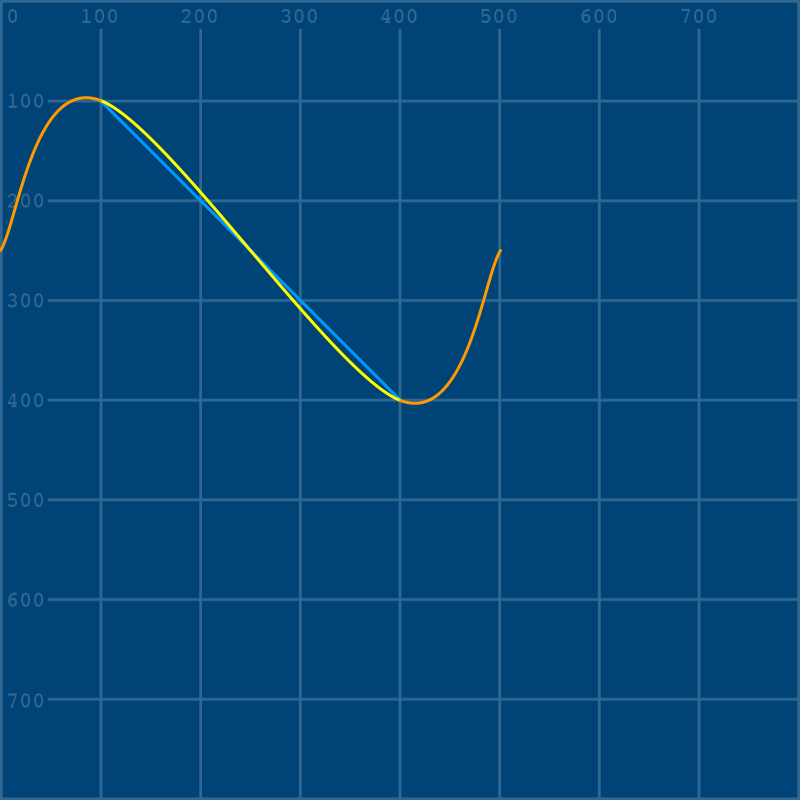

In [2]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

stroke('#0099FF') # pale blue
#line(100,100, 400,400)
curve(0,0, 100,100, 400,400, 500,500)

stroke('#FFFF00') # yellow
curve(0,250, 100,100, 400,400, 500,250)

stroke('#FF9900') # orange
# control point 1:
curve(0,250, 0,250, 100,100, 400,400)
# control point 2:
curve(100,100, 400,400, 500,250, 500,250)

<img src="images/complex_shapes/control.png">

To understand what these extra curves are, it's important to understand what a *spline* actually is. This image from the Wikipedia article on [flat splines](https://en.wikipedia.org/wiki/Flat_spline) shows a version from long before digital visualization:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Spline_%28PSF%29.png/1024px-Spline_%28PSF%29.png">

In this spline, a length of material is bent around two nails. When we use the py5 `curve()` function, the first and last set of arguments are us placing the ends of the material, even if we only see the section between the two nails. You can add a few small ellipses at the locations of our yellow curve's control points to make this even clearer.

In [ ]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

stroke('#0099FF') # pale blue
#line(100,100, 400,400)
curve(0,0, 100,100, 400,400, 500,500)

stroke('#FFFF00') # yellow
curve(0,250, 100,100, 400,400, 500,250)

stroke('#FF9900') # orange
# control point 1:
curve(0,250, 0,250, 100,100, 400,400)
# control point 2:
curve(100,100, 400,400, 500,250, 500,250)

stroke('#11CC88') # mint green
# ellipses at the control points for our yellow curve! 
ellipse(0, 250, 20, 20)
ellipse(500, 250, 20, 20)

<img src="images/complex_shapes/control2.png">

Although we're working with digital lines here instead of a real material, there is a neat function called `curve_tightness()` that allows us to manipulate the elasticity of our curves. To experiment with this, we should add it directly above our first `stroke()` function, so that all subsequent curves are affected. `curve_tightness()` takes just one argument: a number that can be as low as -5 and as high as 5, or anywhere in-between. The default behavior is `curve_tightness(0)`. 

<img src="images/complex_shapes/tightness.png">

## using Bézier curves

Bézier curves use a series of anchors, with their own control points, to shape a curve. They're common in vector drawing programs like Adobe Illustrator and Inkscape (pictured below), where they're usually referred to as "paths." If you don't know much about vector graphics, they're able to be rescaled infinitely without losing quality, and each point in their shape is calculated mathematically. Vectors hugely rely on Bézier curves for all sorts of curved shapes! 

<img src="images/complex_shapes/bezier-inkscape.png">

The `bezier()` function takes quite a few arguments, which you can spread over multiple lines to understand them a little better:

```
bezier(vertex_point_1_x, vertex_point_1_y,
       control_point_1_x, control_point_1_y,
       control_point_2_x, control_point_2_y,
       vertex_point_2_x, vertex_point_2_y)
```

As we add a Bézier curve to our grid, we'll also be using some variables to store the data for our control points. This will make it a bit easier to edit them on the fly without having to mess with that enormous function! (I've also gone ahead and taken out our previous splines.)

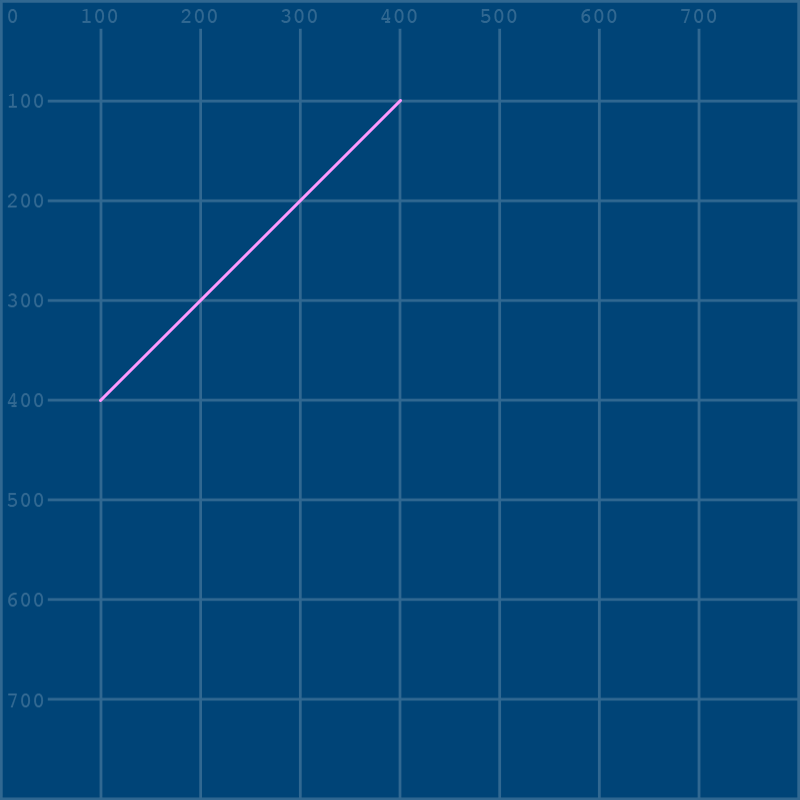

In [3]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

stroke('#FF99FF') # pink
cp1x = 250
cp1y = 250
cp2x = 250
cp2y = 250
bezier(400,100, cp1x,cp1y, cp2x,cp2y, 100,400)

<img src="images/complex_shapes/bezier.png">

Since we're using variables here, if you'd like to be able to visualize your control points while we start to adjust them, it's very easy to do that with a few more lines. In fact, let's go a step farther and also connect the first point of our Bézier curve to the first control point.

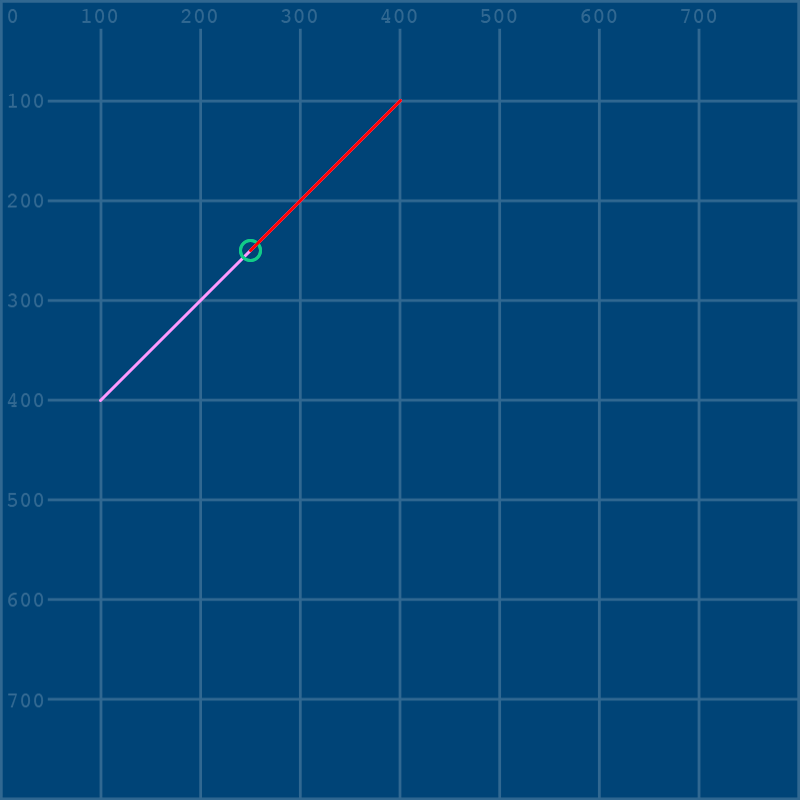

In [4]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

stroke('#FF99FF') # pink
cp1x = 250
cp1y = 250
cp2x = 250
cp2y = 250
bezier(400,100, cp1x,cp1y, cp2x,cp2y, 100,400)

stroke('#11CC88') # mint green
# ellipses at the control points for our Bézier curve! 
ellipse(cp1x, cp1y, 20, 20)
ellipse(cp2x, cp2y, 20, 20)

stroke('#FF0000') # red
# line connecting a control point to the first vertex of the curve!
line(400,100, cp1x,cp1y)

<img src="images/complex_shapes/bezier2.png">

Now, by going back and changing those variables, we will change them every time they appear. Let's pull up our first control point slightly by changing the `cp1y` variable to 150:

```
cp1y = 150
```

In [ ]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

stroke('#FF99FF') # pink
cp1x = 250
cp1y = 150 # pulled up slightly...
cp2x = 250
cp2y = 250
bezier(400,100, cp1x,cp1y, cp2x,cp2y, 100,400)

stroke('#11CC88') # mint green
# ellipses at the control points for our Bézier curve! 
ellipse(cp1x, cp1y, 20, 20)
ellipse(cp2x, cp2y, 20, 20)

stroke('#FF0000') # red
# line connecting a control point to the first vertex of the curve!
line(400,100, cp1x,cp1y)

<img src="images/complex_shapes/bezier3.png">

It's really easy to see the change this way - pulling that control point upwards has also pulled up the top of the Bézier curve! Let's add another line below our last one, to connect the other end of the curve to the second control point.

```
line(100,400, cp2x,cp2y)
```

And while we're here, let's also scroll back up and change that second control point's position a bit. 

```
cp2x = 300
cp2y = 350
```

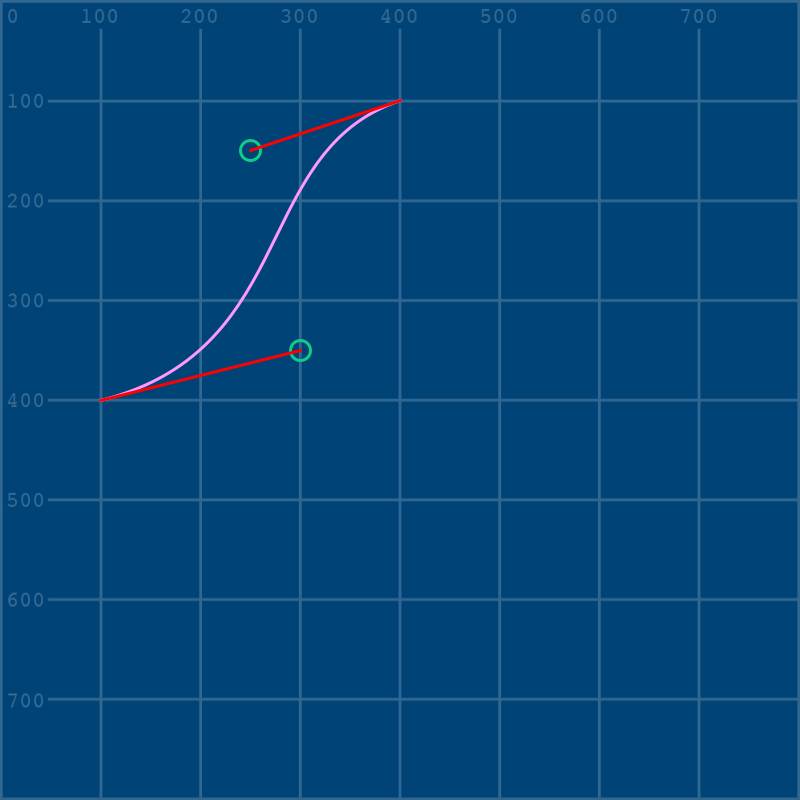

In [5]:
size(800, 800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke_weight(3)

stroke('#FF99FF') # pink
cp1x = 250
cp1y = 150 # pulled up slightly...
cp2x = 300
cp2y = 350
bezier(400,100, cp1x,cp1y, cp2x,cp2y, 100,400)

stroke('#11CC88') # mint green
# ellipses at the control points for our Bézier curve! 
ellipse(cp1x, cp1y, 20, 20)
ellipse(cp2x, cp2y, 20, 20)

stroke('#FF0000') # red
# line connecting a control point to the first vertex of the curve!
line(400,100, cp1x,cp1y)
line(100,400, cp2x,cp2y)

<img src="images/complex_shapes/bezier4.png">

Learning exactly how to pull these control points and curves around can take practice, and there's a few different ways to do it outside of py5 if you like. 

Here's an interactive challenge called the Bézier Game: [bezier.method.ac/](http://bezier.method.ac/)

For advanced playing around, you can also get a vector drawing program like [Inkscape](https://inkscape.org/) (which is free), Adobe Illustrator, etc. Using the path tool in one of these to create a curve can leave you feeling much more confident about where your control points will have to be placed in py5. In fact, that's how the upcoming challenges were devised!

## vertices 

We've been calling these *points* throughout the rest of the tutorial, but it's worth being specific: a vertex (plural: vertices) is a single point in a shape. Triangles have three vertices, a pentagon has five, and very complex shapes can have dozens of them. Three-dimensional shapes can also be constructed of vertices - for example, you can clearly see the vertices below in Blender's de-facto mascot Suzanne (a monkey head).

<img src="images/complex_shapes/vertices-blender.png">

We'll be using the same <a href="images/complex_shapes/grid.png">grid image</a> as our background while we experiment with vertices, so either keep it in the same folder or go ahead and call it by its entire URL.

There are two shape functions we'll be introducing here that are a bit unfamiliar, `begin_shape()` and `end_shape()`. You can think of using `begin_shape()` as being like hitting play on a recorder, and `end_shape()` is when you hit stop. Between those functions, we use the `vertex()` function to draw our individual points. `end_shape()` can also take optional arguments - for example, by using CLOSE, we can make sure it automatically closes the shape off once we're done.

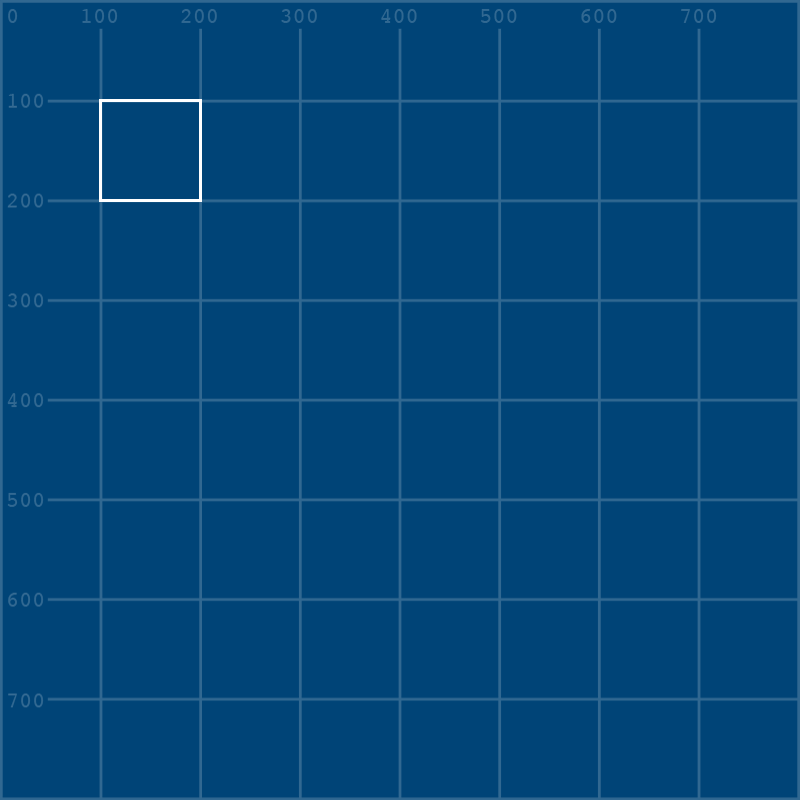

In [6]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

begin_shape()
vertex(100,100)
vertex(200,100)
vertex(200,200)
vertex(100,200)
end_shape(CLOSE)

<img src="images/complex_shapes/shape.png">

Of course, you don't have to close off the shape. You can combine an open shape with a `fill()` for an interesting look:

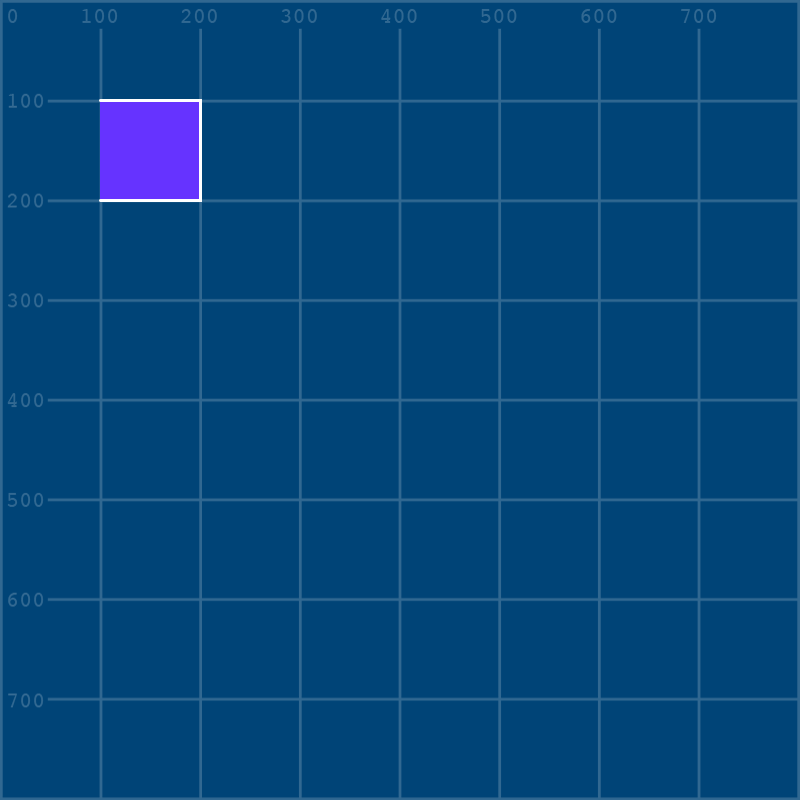

In [7]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

fill('#6633FF')
begin_shape()
vertex(100,100)
vertex(200,100)
vertex(200,200)
vertex(100,200)
end_shape()

<img src="images/complex_shapes/shape2.png">

There are optional arguments for `begin_shape()` too, which you can provide to change how the lines are connected (if at all!) Below is an example of `begin_shape(POINTS)` and `begin_shape(LINES)`. 

<img src="images/complex_shapes/vertices-beginshape.png">

*Reference: [begin_shape()](/reference/sketch_begin_shape)*

## Bézier vertices

Both Bézier curves and Catmull-Rom splines have vertex equivalents, `bezier_vertex()` and `curve_vertex()`. We'll be focusing on the Bézier vertex equivalent, since it gives us a greater amount of control over the resulting curves. `bezier_vertex()` takes quite a few arguments, spread out for better readability below: 

```
bezierVertex(control_point_1_x, control_point_1_y,
             control_point_2_x, control_point_2_y,
             vertex_point_2_x, vertex_point_2_y)
```

We'll be using image reference for the following shapes. It may be helpful to keep this image up or <a href="images/complex_shapes/vertices.png">save a copy</a> to quickly reference. The light blue lines and circles represent our control points, and their connections to our Bézier vertices, so that we don't have to draw them ourselves.  

<img src="images/complex_shapes/vertices.png">

## S-Bend

The S-Bend (in the center of the image) has only two vertices. It could be drawn with a `bezier()` function, but learning to do the same thing with shapes is worth practicing, as it'll help with building more complex curved shapes later. We'll start by creating a new shape with a single vertex, and then add onto it. It's only a single point, so it won't look like much of anything.

In [ ]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

begin_shape()
vertex(400,200) # starting (upper) vertex
end_shape()

Next, we'll be adding our second vertex - and this one will be a `bezier_vertex()`, so in addition to its actual location, we'll be defining those control points. Note that the first set of arguments in `bezier_vertex()` is actually positioning the control point for the regular `vertex()` right before it!

In [ ]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

begin_shape()
vertex(400,200) # starting (upper) vertex
bezier_vertex(
  300,300, # control point for the starting vertex
  500,500, # control point for the second (lower) vertex
  400,600  # second (lower) vertex coordinates
)
end_shape()

<img src="images/complex_shapes/shape3.png">

If you go back and take a peek at that <a href="images/complex_shapes/vertices.png">reference image</a>, you can easily match the position of those light blue handles to the X and Y position of the control points in your actual code. 

## heart

We'll create half of the heart shape first, just the same as we did the S-bend, with a `vertex()` and a `bezier_vertex()`.

In [ ]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

begin_shape()
vertex(600,400)
bezier_vertex(420,300, 550,150, 600,250)
end_shape()

<img src="images/complex_shapes/heart.png">

Making the second half of the heart will be simple: you know that to close the shape, it will have to end where it began. Thus, the final `bezier_vertex()` will have to share its coordinates with the opening `vertex()`. To figure out what goes in the gaps, consult the <a href="images/complex_shapes/vertices.png">reference image</a> again, and take a look at the position of the light blue handles and control points.

In [ ]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

begin_shape()
vertex(600,400)
bezier_vertex(420,300, 550,150, 600,250)
bezier_vertex(___,___, ___,___, 600,400) # What goes here?
end_shape()

## Chinese coin

This shape (filled in with violet in the <a href="images/complex_shapes/vertices.png">reference image</a>) is based on a metal coin with a square hole in it, first introduced in China many centuries ago. To make it, we'll not only be using `begin_shape()` and `end_shape()` to create the filled in areas, but new functions called `begin_contour()` and `end_contour()` to cut out the square hole. 

Usually, we might draw a circle with the `ellipse()` function, but since we're required to use the shape functions here (so that we can cut a hole out of it) we'll have to make it out of `vertex()` and `bezier_vertex()` functions. To start with, we can build a diamond out of a few vertices:

In [ ]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

begin_shape()
vertex(100,600)
vertex(200,500)
vertex(300,600)
vertex(200,700)
vertex(100,600)
end_shape()

<img src="images/complex_shapes/coin.png">

Now, it's just a matter of converting all of those vertices (aside from the first one - shapes always begin with a regular `vertex()` function) into Bézier vertices.

In [ ]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

begin_shape()
vertex(100,600)
bezier_vertex(___,___, ___,___, 200,500)
bezier_vertex(___,___, ___,___, 300,600)
bezier_vertex(___,___, ___,___, 200,700)
bezier_vertex(___,___, ___,___, 100,600)
end_shape()

This time, you won't be forced to figure this out yourself, but for the curious, here's a circular path from Inkscape that might make things clearer:

<img src="images/complex_shapes/vertices-bezier-circle.png">

For now, you can put in these values and watch your diamond turn into a perfect circle:

In [ ]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

begin_shape()
vertex(100,600)
bezier_vertex(100,545, 145,500, 200,500)
bezier_vertex(255,500, 300,545, 300,600)
bezier_vertex(300,655, 255,700, 200,700)
bezier_vertex(145,700, 100,655, 100,600)
end_shape()

<img src="images/complex_shapes/coin2.png">

Addding in our *contour* to cut the square hole from the middle of the coin is relatively straightforward, and the syntax will all look familiar - it's really similar to how we use `begin_shape()` and `end_shape()`. One thing you need to keep in mind is that, if you've drawn your shape's vertices clockwise, the contour *must* be drawn counter-clockwise, and vice versa. Whatever way the shape itself is "winding", cutting a hole in it must "wind" in the opposite direction to show up! 

We'll now add the `begin_contour()` and `end_contour()` functions to our coin, and the vertices for a square inside of them. However, you won't be able to fully appreciate that this isn't simply another shape unless you also add a fill colour before the circle begins.

In [ ]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
image(grid, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

fill('#6633FF')
begin_shape()
vertex(100,600)
bezier_vertex(100,545, 145,500, 200,500)
bezier_vertex(255,500, 300,545, 300,600)
bezier_vertex(300,655, 255,700, 200,700)
bezier_vertex(145,700, 100,655, 100,600)
begin_contour()
vertex(180,580)
vertex(180,620)
vertex(220,620)
vertex(220,580)
end_contour()
end_shape()

<img src="images/complex_shapes/coin3.png">

## Bézier task

Time for another challenge!

In addition to the <a href="images/complex_shapes/grid.png">grid.png</a> image we're using to assist with drawing coordinates, you'll need this <a href="images/complex_shapes/beziers.png">beziers.png</a> image to layer over it as a reference. Either make sure that both images are in the right place on your local computer (in the same folder as the sketch, or in a folder called DATA beside the sketch) or reference them using their complete URLs. 

Here is the code you'll be using to set things up.

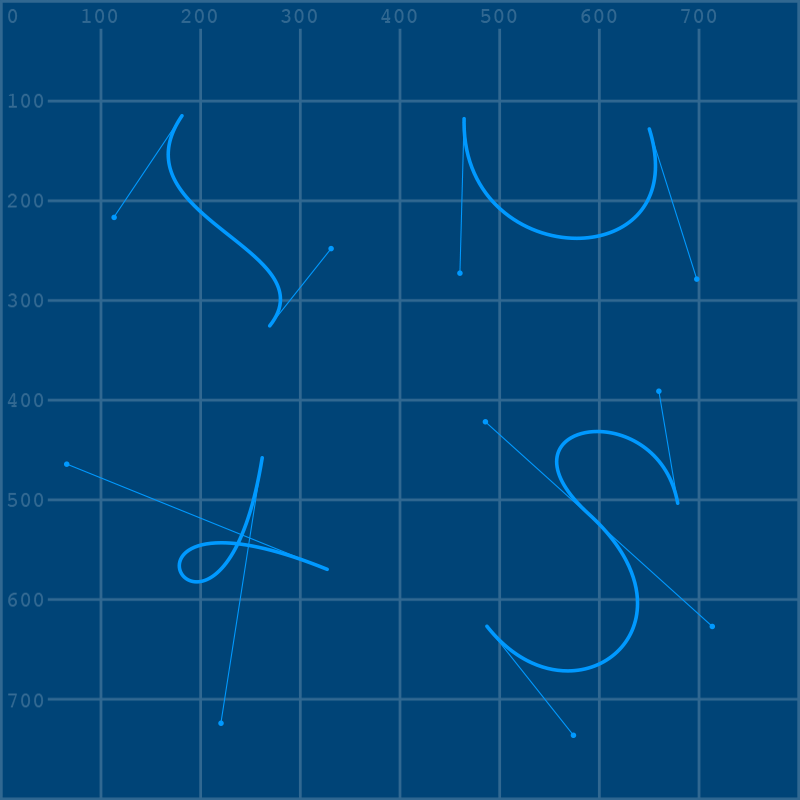

In [8]:
size(800,800)
grid = load_image('images/complex_shapes/grid.png')
beziers = load_image('images/complex_shapes/beziers.png')
image(grid, 0, 0)
image(beziers, 0, 0)
no_fill()
stroke('#FFFFFF')
stroke_weight(3)

Placed one after the other, with the "top" image second, it should look like this:

<img src="images/complex_shapes/beziers2.png">

Your goal is simple: recreate each of these shapes using a `begin_shape()` and `end_shape()` function, with a `vertex()` and at least one `bezier_vertex()` inside them. Remember that the handles and control points are already placed for you in these examples, and don't worry about perfectly matching the reference - this is just a way to get used to the weirdness of creating bezier curves out of vertices. 

## Apple Logo task 

You've almost made it - here's a final challenge!

We'll be recreating an older version of the Apple logo, back when it was quite colorful. This logo was retired in 1999 when Apple began to put forth a sleeker image. 

Why does the Apple logo have a bite out of it? Well, there's a rumour that it could be connected to Alan Turing – a man who is widely considered to be the father of theoretical computer science and artificial intelligence. Among his many accomplishments, Turing managed to crack the Enigma cypher used to encrypt Nazi communications during World War II. Despite this, when he was outed as gay in 1952, Britain gave him two choices: be chemically castrated via forced hormone treatment, or go to prison. Two years later, he was found dead by cyanide poisoning with a bitten apple nearby; it's unclear if he was deliberately re-enacting the scene from Walt Disney's "*Snow White and the Seven Dwarfs*", his favorite fairy tale, or had poisoned himself accidentally with electroplating equipment. 

Either way, the bitten apple's symbology remains compelling. 

<img src="images/complex_shapes/apple.png">

*The Apple Computer rainbow colour logo, in use from 1977–1999.* 

*Rob Janoff [Public domain], via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Apple_Computer_Logo_rainbow.svg)*

In addition to our <a href="images/complex_shapes/grid.png">grid.png</a> image, you'll want to layer our <a href="images/complex_shapes/apple.png">apple.png</a> over it, so either keep them in the same folder or go ahead and call them by their entire URLs. Use this code to get started:

In [ ]:
size(800,850)
background('#004477')

grid = load_image('images/complex_shapes/grid.png')
logo = load_image('images/complex_shapes/apple.png')

image(grid, 0, 0)
image(logo, 0, 0)

<img src="images/complex_shapes/apple-start.png">

How are you going to create this apple? Well, a lot of Bézier vertices will be involved. Here's an in-progress image that might help you out by showing off the positions of some of those handles: 

<img src="images/complex_shapes/apple-clue.png">

There's another important detail here - those coloured stripes. Your instinct will likely be to make the shape of an apple, and then fill it in with color... but how? Just like how we use `fill()` to color something in before we've created it, consider creating your colored bands beforehand. If you first create a series of colored bands filling your sketch, and then cover it with a white square shape, you can then use *contours* to cut out the shape of an apple. Remember that your shape and your contour have to wind in opposite directions.

One last hint: don't overthink the complexities of this shape. You can create the leaf afterwards with another shape function, and you can even create the 'bite' out of the apple last by covering it with a well-placed `ellipse()`! 

If you've found these exercises tedious at times, don't fret. They are intended to get you comfortable with producing visual output in py5, but as you can see, importing images into your sketches is a perfectly viable way to accomplish your goals as well. Combining py5 shapes and outside art assets in any ratio you like is a great way to play to your strengths.